# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


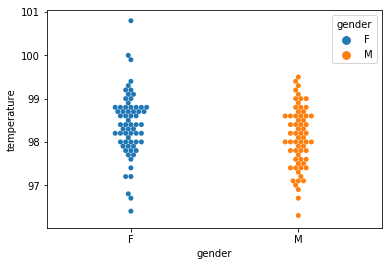

In [3]:
_ = sns.swarmplot(x='gender', y='temperature',hue='gender', data=df )
plt.xlabel('gender')
plt.show()

In [4]:
print(df.temperature.min())
print(df.temperature.max())
print((df.temperature.max() - df.temperature.min()) / 11)
print(df.temperature.mean())

96.3
100.8
0.4090909090909091
98.24923076923078


### Is the distribution of body temperatures normal?
The short answer is: yes, pretty much! There is a slight skew to the left but nothing that should preclude the data from being considered normally distributed. 

Here are some [some quick and dirty ways](https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/) to determine the bin width and how many bins to use. Essentially, the number of bins is roughly determined to be the square root of the number of records. There are 130 records and the square root of 130 is about 11. The site actually says to ***round up*** regardless of the size of the decimal. Below there are two plots. One with 11 bins and the other with 12. Both are plotted to show that with either 11 or 12 bins the distribution is approximately normal.

The bin width is determined by "dividing the \[...\] (Max - Min) value by the # of bins." (100.8 - 96.3) / 11 is approximately 0.4. The same bin width was used for both the 11 bins and 12 bins.



2018-12-20 10:25:57.542801
2018-12-20 10:25:57.801840


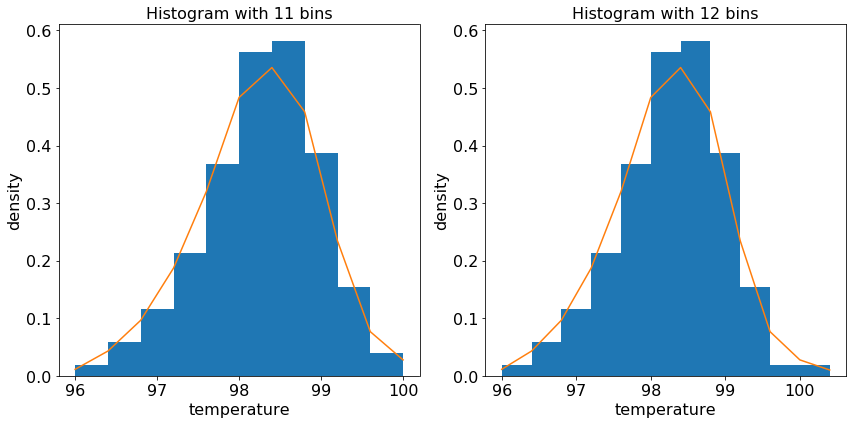

In [5]:
# Is the distribution of body temperatures normal?
print(dt.datetime.now())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

def mlist(start_n, increment, n):
    llist = []
    for i in range(n):
        llist.append(start_n + (increment*i))
    
    return llist

def hist_plots(dframe, b_edges, axx):
    density = stats.gaussian_kde(dframe.temperature)
    n_bins = len(b_edges)
    n, x, _ = axes[axx].hist(dframe.temperature, bins=b_edges, density=True)
    axes[axx].set_title("Histogram with " +str(n_bins)+ " bins", size=16)
    axes[axx].plot(x,density(x))
    axes[axx].set_xlabel('temperature')
    axes[axx].set_ylabel('density')
    axes[axx].xaxis.label.set_fontsize(16)
    axes[axx].yaxis.label.set_fontsize(16)
    axes[axx].tick_params(axis = 'x', which = 'major', labelsize = 16)
    axes[axx].tick_params(axis = 'y', which = 'major', labelsize = 16)
    plt.tight_layout()
    
    return 0

lbin = []
lbin.append(mlist(96.0,.4,11))
lbin.append(mlist(96.0,.4,12))

for i in range(len(lbin)):
    _ = hist_plots(df,lbin[i],i)
print(dt.datetime.now())

### Is the sample size large? Are the observations independent?
* The number of records in the sample is 130. That easily exceeds the "n is greater than or equal to 30" condition for Normality. 
* The observations are independent because they most certainly do not exceed 10% of the entire population of humans. 



In [6]:
print(df.shape)

(130, 3)


### Is the true population mean really 98.6 degrees F?
1. First, try a bootstrap hypothesis test.
2. Now, let's try frequentist statistical testing. 
   * Would you use a one-sample or two-sample test? Why?
   * In this situation, is it appropriate to use the  t  or  z  statistic?
3. Now try using the other test. How is the result be different? Why?

In [7]:
bs_sample = np.random.choice(df.temperature, size=len(df))
bs_sample[:5]
print(np.mean(bs_sample))
print(np.std(bs_sample))

98.27
0.6264245304166274


In [8]:
# Empirical cumulative distribution functions (ECDF)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


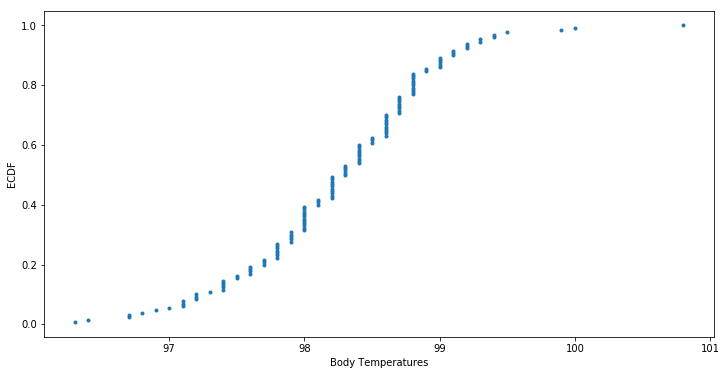

In [33]:
# Compute ECDF for versicolor data: x_vers, y_vers
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

x_temp, y_temp = ecdf(df.temperature)

# Generate plot
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Body Temperatures')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [18]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def diff_from_wund(data,wund_value = 98.6):
    return np.mean(data) - wund_value




### Bootstrap Hypothesis Test
**Null Hypothesis:** The true mean temperature of the human body is 98.6$^{\circ}$F.

**Alternative Hypothesis** The true mean temperature of the human body is not 98.6$^{\circ}$F.

In [27]:
temp_mean = np.mean(df.temperature)
print('the mean temp of the dataset: ', temp_mean)

Wunderlich_value = 98.6 # degrees Fahrenheit
print('Wunderlich\'s mean: ', Wunderlich_value)

print(diff_from_wund(df.temperature))

diff_observed = diff_from_wund(df.temperature)
print("observed difference: ", diff_observed)
# shift the dataset
data_shifted = (df.temperature - temp_mean) + Wunderlich_value

print(data_shifted[:5])

boot_reps = draw_bs_reps(data_shifted, diff_from_wund, 100000)
print(boot_reps[:5])
p_value = np.sum(boot_reps <= diff_observed)
p_value

the mean temp of the dataset:  98.24923076923078
Wunderlich's mean:  98.6
-0.35076923076921673
observed difference:  -0.35076923076921673
0    99.650769
1    98.750769
2    98.150769
3    99.550769
4    98.350769
Name: temperature, dtype: float64
[-0.00846154  0.01769231 -0.14538462 -0.06846154 -0.07615385]


0

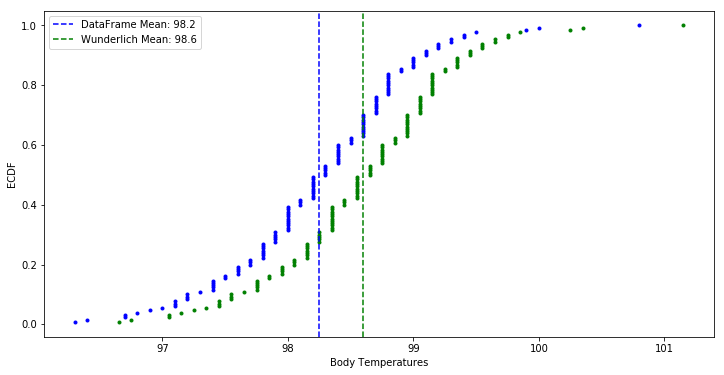

In [152]:
# Compute ECDF for versicolor data: x_vers, y_vers
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

x_temp, y_temp = ecdf(df.temperature)
x_2, y_2 = ecdf(data_shifted)

# Generate plot
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none', color='b')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='g')

# Plot the means of both the original data set and the shifted data set
_ = plt.axvline(x=temp_mean,color='b', linestyle='--', label='DataFrame Mean: 98.2')
#plt.annotate('DataFrame Mean: 98.2 ', 
#             xy=(98.25, 0.6),  
#             xytext=(-145, -5),
#             textcoords='offset points',
#             arrowprops=dict(facecolor='blue' ))

_ = plt.axvline(x=np.mean(data_shifted),color='g', linestyle='--',label='Wunderlich Mean: 98.6')
#plt.annotate(' Wunderlich Mean: 98.6 ', 
#             xy=(98.6, 0.375),  
#             xytext=(25, -5),
#             textcoords='offset points',
#             arrowprops=dict(facecolor='green'))

# Label the axes
_ = plt.xlabel('Body Temperatures')
_ = plt.ylabel('ECDF')

# Display the plot
plt.legend(loc='upper left')
plt.show()

In [100]:
np.mean(data_shifted)

98.59999999999992

98.24941392307693
98.48846153846154
97.96153846153847
0.0052692307692306884
[97.96153846153847, 97.9668076923077, 97.97207692307693, 97.97734615384616, 97.98261538461539]
95% CI:  [98.12459615 98.37461538]
99% CI:  [98.08461154 98.41538462]
0.06405661469519336
0.0636673251282648


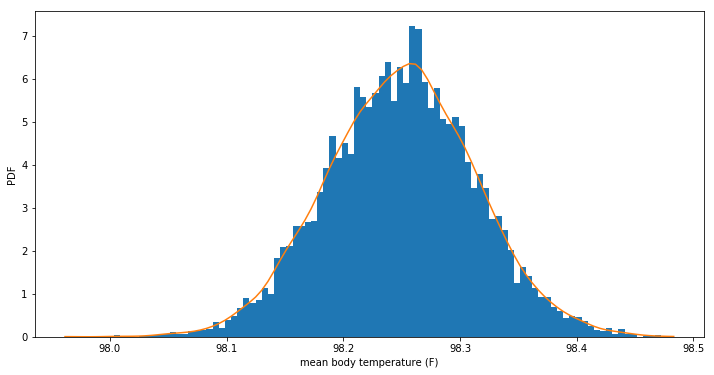

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature,np.mean,10000)

print(np.mean(bs_replicates))
print(np.max(bs_replicates))
print(np.min(bs_replicates))

print((np.max(bs_replicates) - np.min(bs_replicates)) / np.sqrt(10000))

bin_edges = mlist(np.min(bs_replicates),\
                 (np.max(bs_replicates) - np.min(bs_replicates)) / np.sqrt(10000), int(np.sqrt(10000)))

print(bin_edges[:5])

conf_int_95 = np.percentile(bs_replicates,[2.5,97.5])
conf_int_99 = np.percentile(bs_replicates,[0.5,99.5])

print('95% CI: ', str(conf_int_95))
print('99% CI: ', str(conf_int_99))


# Compute and print SEM
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
density = stats.gaussian_kde(bs_replicates)
_, x, _ = plt.hist(bs_replicates, bins=bin_edges, density=True)
_ = plt.plot(x,density(x))
_ = plt.xlabel('mean body temperature (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### The true population mean does not seem to be 98.6 degrees F according to our bootstrap hypothesis. 
It looks like it's much closer to 98.2 degrees F. With an SEM and Standard Deviation of about 0.064 it would take at least 6 standard deviations or SEMs from the mean to include 98.6 degrees F in the confidence interval. That makes it highly unlikely that a mean temperature of 98.2 deg F would be recorded if the true population mean were 98.6. 

### Now, let's try frequentist statistical testing.
1. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the t or z statistic?

In [12]:
# pairs bootstrap ...